In [1727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from numpy import log
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from datetime import timedelta
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [1728]:
data = pd.read_excel('./customer_order_summary.xlsx', encoding='latin-1')

In [1729]:
data.head()

,customer_id,first_time,recent_time,n_orders,n_orders_in_last_week,n_orders_in_last_4_weeks,amount,amount_in_last_week,amount_in_last_4_weeks,avg_dist_from_rest,avg_delivery_time
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


In [1730]:
data.shape

(10000, 11)

In [1731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
customer_id                 10000 non-null int64
first_time                  10000 non-null datetime64[ns]
recent_time                 10000 non-null datetime64[ns]
n_orders                    10000 non-null int64
n_orders_in_last_week       1923 non-null float64
n_orders_in_last_4_weeks    4341 non-null float64
amount                      10000 non-null int64
amount_in_last_week         10000 non-null int64
amount_in_last_4_weeks      10000 non-null int64
avg_dist_from_rest          10000 non-null float64
avg_delivery_time           10000 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(6)
memory usage: 859.5 KB


In [1732]:
null_columns = data.columns[data.isnull().any()]
null_column_value= data[null_columns].isnull().sum()
not_null_column_value =data[null_columns].notnull().sum()
def percentageOfNullValues():
    for col in null_columns:
        print('column: {} null values :{} null percenatge :{:.2f}'.format(col,null_column_value[col],(null_column_value[col]/(null_column_value[col]+not_null_column_value[col])*100)))
percentageOfNullValues()

column: n_orders_in_last_week null values :8077 null percenatge :80.77
column: n_orders_in_last_4_weeks null values :5659 null percenatge :56.59


In [1733]:
data[data['n_orders_in_last_4_weeks'].isnull() == True]['amount_in_last_4_weeks'].mean()

0.0

In [1734]:
data[data['n_orders_in_last_week'].isnull() == True]['amount_in_last_week'].mean()

0.0

In [1735]:
data['n_orders_in_last_4_weeks'].fillna(0,inplace=True)
data['n_orders_in_last_week'].fillna(0,inplace=True)

In [1736]:
data.isnull().any()

customer_id                 False
first_time                  False
recent_time                 False
n_orders                    False
n_orders_in_last_week       False
n_orders_in_last_4_weeks    False
amount                      False
amount_in_last_week         False
amount_in_last_4_weeks      False
avg_dist_from_rest          False
avg_delivery_time           False
dtype: bool

In [1737]:
data.head()

,customer_id,first_time,recent_time,n_orders,n_orders_in_last_week,n_orders_in_last_4_weeks,amount,amount_in_last_week,amount_in_last_4_weeks,avg_dist_from_rest,avg_delivery_time
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


In [1738]:
data.describe()

,customer_id,n_orders,n_orders_in_last_week,n_orders_in_last_4_weeks,amount,amount_in_last_week,amount_in_last_4_weeks,avg_dist_from_rest,avg_delivery_time
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,6.714023e+05,7.006200,0.333600,1.388100,2253.273600,109.497500,455.491200,2.35620,36.914300
std,3.901880e+05,13.118619,0.910052,3.041842,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,2.800000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,3.365148e+05,1.000000,0.000000,0.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,6.683395e+05,2.000000,0.000000,0.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,1.005002e+06,7.000000,0.000000,1.000000,2040.000000,0.000000,398.000000,3.02500,47.000000
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.90000,83.000000


In [1739]:
print('range of avg_dist_from_rest [{} , {}]'.format(data['avg_dist_from_rest'].min(),data['avg_dist_from_rest'].max()))

range of avg_dist_from_rest [-0.8 , 5.9]


In [1740]:
print('total negative number in avg_dist_from_rest : {}'.format(len(data[data['avg_dist_from_rest']<0])))
print('total zero value in avg_dist_from_rest : {}'.format(len(data[data['avg_dist_from_rest']==0])))
print('total positive number in avg_dist_from_rest : {}'.format(len(data[data['avg_dist_from_rest']>0])))

total negative number in avg_dist_from_rest : 44
total zero value in avg_dist_from_rest : 22
total positive number in avg_dist_from_rest : 9934


In [1741]:
print('average delivery time for negative distances : {:.2f}'.format\
      (data[data['avg_dist_from_rest']<0]['avg_delivery_time'].mean()))

print('average delivery time for negative distances : {:.2f}'.format\
      (data[(data['avg_dist_from_rest'] > 0) & (data['avg_dist_from_rest'] < 1)]['avg_delivery_time'].mean()))

average delivery time for negative distances : 31.27
average delivery time for negative distances : 35.18


In [1742]:
data['avg_dist_from_rest'] = data['avg_dist_from_rest'].apply(lambda x: abs(x))

In [1743]:
data= data[data['avg_dist_from_rest'] > 0.0]
len(data[data['avg_dist_from_rest']<0])

0

### Feature Engineering

In [1744]:
data['first_time']=pd.to_datetime(data['first_time'])
data['recent_time']=pd.to_datetime(data['recent_time'])


In [1745]:
print('data available range : [{}, {}]'.format(data['first_time'].min(),data['recent_time'].max()))

data available range : [2015-06-05 17:21:00, 2016-01-13 05:54:00]


In [1746]:
#let data collected on 
NOW = dt.datetime(2016, 1, 14)
print(NOW)
data['last_order_diff']= NOW - data['recent_time']
data['last_order_diff']=data['last_order_diff']/np.timedelta64(1,'D')

data['avg_amout_order']=data['amount']/data['n_orders']
data['avg_amout_order']= data['avg_amout_order'].apply(lambda x: round(x, 2))

data.head()
print(len(data[data['last_order_diff']<0]))

2016-01-14 00:00:00
0


### Data Exploration

In [1747]:
data.describe()

,customer_id,n_orders,n_orders_in_last_week,n_orders_in_last_4_weeks,amount,amount_in_last_week,amount_in_last_4_weeks,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
count,9.978000e+03,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,6.712876e+05,7.017939,0.334035,1.390259,2257.037482,109.665865,456.169673,2.363420,36.912508,79.838745,360.213554
std,3.902611e+05,13.130442,0.910865,3.044430,5141.272390,397.448829,1238.865794,0.964743,13.176676,48.504703,373.361951
min,2.800000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.100000,15.000000,0.754167,0.080000
25%,3.360400e+05,1.000000,0.000000,0.000000,280.000000,0.000000,0.000000,1.700000,26.000000,40.720660,139.000000
50%,6.678395e+05,2.000000,0.000000,0.000000,689.000000,0.000000,0.000000,2.400000,36.500000,66.291319,281.125000
75%,1.004866e+06,7.000000,0.000000,1.000000,2043.500000,0.000000,399.000000,3.100000,47.000000,112.435590,478.387500
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.900000,83.000000,219.078472,9906.500000


In [1748]:
data.tail()

,customer_id,first_time,recent_time,n_orders,n_orders_in_last_week,n_orders_in_last_4_weeks,amount,amount_in_last_week,amount_in_last_4_weeks,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
9995,995495,2015-12-05 05:41:00,2015-12-05 10:58:00,1,0.0,1.0,69,0,69,1.3,23,39.543056,69.0
9996,337003,2015-07-17 12:30:00,2015-07-20 17:43:00,1,0.0,0.0,305,0,0,2.9,49,177.261806,305.0
9997,993928,2015-11-11 20:27:00,2015-11-14 21:05:00,1,0.0,0.0,85,0,0,2.2,53,60.121528,85.0
9998,398583,2015-07-06 04:25:00,2015-07-10 20:19:00,1,0.0,0.0,630,0,0,0.1,20,187.153472,630.0
9999,462448,2015-07-25 00:36:00,2015-07-25 06:21:00,1,0.0,0.0,293,0,0,3.7,49,172.735417,293.0


In [1749]:
label=data['customer_id']
data.drop(['customer_id','first_time','recent_time','n_orders_in_last_week'\
           ,'amount_in_last_week','n_orders_in_last_4_weeks','amount_in_last_4_weeks'],axis=1,inplace=True)

In [1750]:
data.head()

,n_orders,amount,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
0,212,138808,1.6,51,34.904167,654.75
1,211,56404,2.2,42,29.387500,267.32
2,189,36020,2.5,57,35.135417,190.58
3,184,32489,3.1,55,30.928472,176.57
4,182,85150,2.4,36,25.023611,467.86


### Selecting Sample 

In [1751]:
pd.concat([data[data['amount']==data['amount'].max()],\
           data[data['last_order_diff']==data['last_order_diff'].max()].head(1),\
          ])


,n_orders,amount,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
0,212,138808,1.6,51,34.904167,654.75
8559,1,178,1.9,47,219.078472,178.00


In [1752]:
indices = [12, 201, 6587]
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print("Samples:")
samples.head()

Samples:


,n_orders,amount,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
0,132,33171,1.8,23,65.229861,251.30
1,47,7531,3.1,37,25.934028,160.23
2,1,246,2.4,61,196.859722,246.00


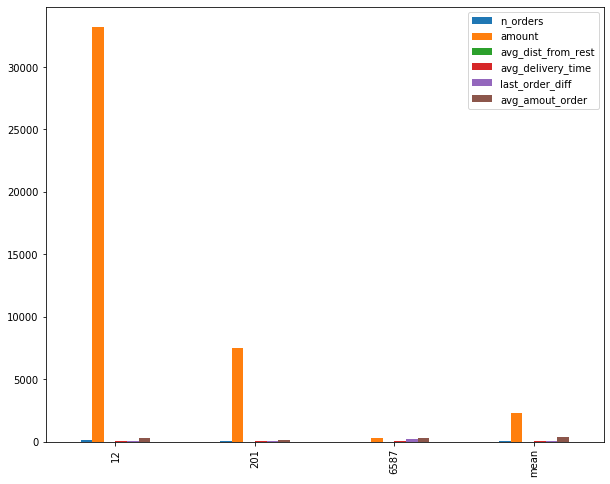

In [1753]:
# getting means of columns
mean_data = data.describe().loc['mean', :]

# append the mean data to the samples
samples_bar = samples.append(mean_data)

# construct indices
samples_bar.index = indices + ['mean']

# plot the bar plot
samples_bar.plot(kind='bar', figsize=(10,8))

### Feature Relevance

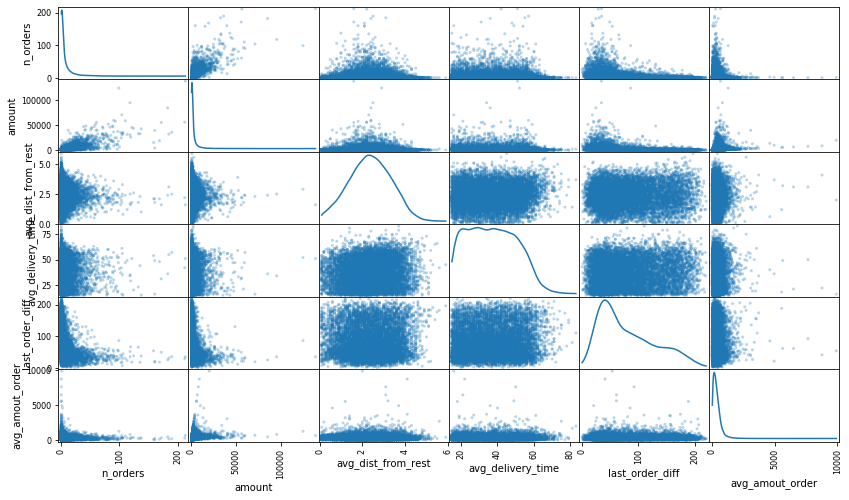

In [1754]:
pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(14,8), diagonal='kde');

In [1755]:
correlations_data = data.corr()['amount'].sort_values()
correlations_data

last_order_diff      -0.244546
avg_dist_from_rest   -0.016758
avg_delivery_time     0.002667
avg_amout_order       0.227655
n_orders              0.763239
amount                1.000000
Name: amount, dtype: float64

In [1756]:
# Make a copy of data for regression, by droping the amount column
reg_data = data.drop(['amount'], axis=1)

# Split data into training and test sets by using the given feature as target
X_train, X_test, y_train, y_test = train_test_split(reg_data, data['amount'], test_size=0.25, random_state=101)

# Create a decision tree regressor and fit it into the training set
regressor = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)

# Find the prediction score using the testing set
score = regressor.score(X_test,y_test)

score

0.9684632458671174

In [1757]:
model_data = reg_data

(5.0, 0.0)

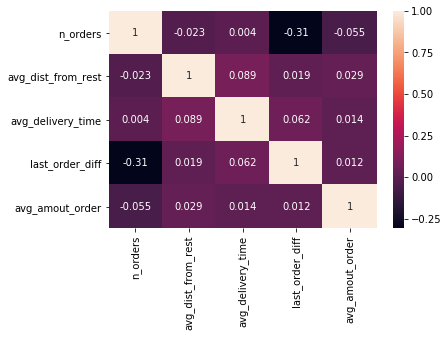

In [1758]:
ax=sns.heatmap(model_data.corr() ,annot=True )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Data Preprocessing


In [1759]:
model_data.describe()

,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,7.017939,2.363420,36.912508,79.838745,360.213554
std,13.130442,0.964743,13.176676,48.504703,373.361951
min,1.000000,0.100000,15.000000,0.754167,0.080000
25%,1.000000,1.700000,26.000000,40.720660,139.000000
50%,2.000000,2.400000,36.500000,66.291319,281.125000
75%,7.000000,3.100000,47.000000,112.435590,478.387500
max,212.000000,5.900000,83.000000,219.078472,9906.500000


From the mean and median values observed above, we can see that the data is quite skewed. Hence, we need to perform some feature scaling and remove outliers to get a better representation of the data and to ensure that the results obtained from the analysis are significant and meaningful.

### Feature Scaling

Text(0.5, 1.0, 'Order Number Histogram')

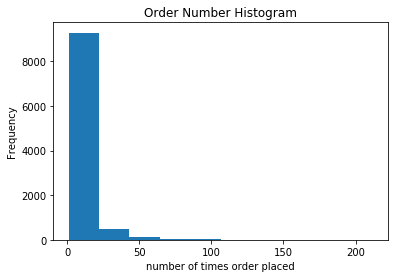

In [1760]:
model_data['n_orders'].plot(kind='hist')
plot.xlabel('number of times order placed')
plot.title('Order Number Histogram')

Text(0.5, 1.0, 'Order Recency Histogram')

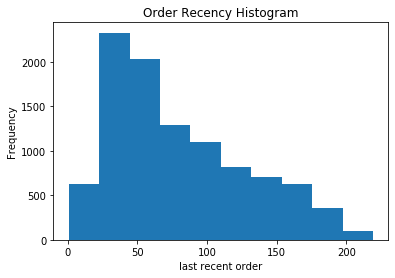

In [1761]:
model_data['last_order_diff'].plot(kind='hist')
plot.xlabel('last recent order')
plot.title('Order Recency Histogram')

Text(0.5, 1.0, 'Average Amount  Histogram')

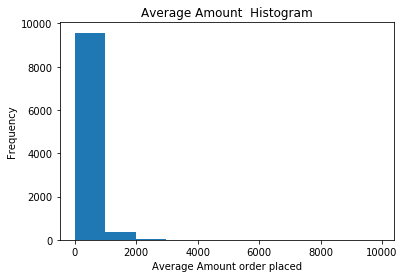

In [1762]:
model_data['avg_amout_order'].plot(kind='hist')
plot.xlabel('Average Amount order placed')
plot.title('Average Amount  Histogram')

In [1763]:
# Splitting data into two subsets, one subset will undergo log transform and the other will undergo standard scaling

skewed_features = model_data[['avg_amout_order', 'n_orders', 'last_order_diff']]
normal_features = model_data[['avg_dist_from_rest', 'avg_delivery_time']]

In [1764]:
log_features = skewed_features.apply(lambda x: np.log(x+1))

In [1765]:
from sklearn import preprocessing
normalized_features = pd.DataFrame(preprocessing.normalize(normal_features), columns=['avg_dist_from_rest', \
                                                                                      'avg_delivery_time'])
normalized_features.describe()

,avg_dist_from_rest,avg_delivery_time
count,9978.000000,9978.000000
mean,0.072845,0.996430
std,0.042435,0.004433
min,0.001852,0.952424
25%,0.043957,0.995716
50%,0.063508,0.997981
75%,0.092459,0.999033
max,0.304776,0.999998


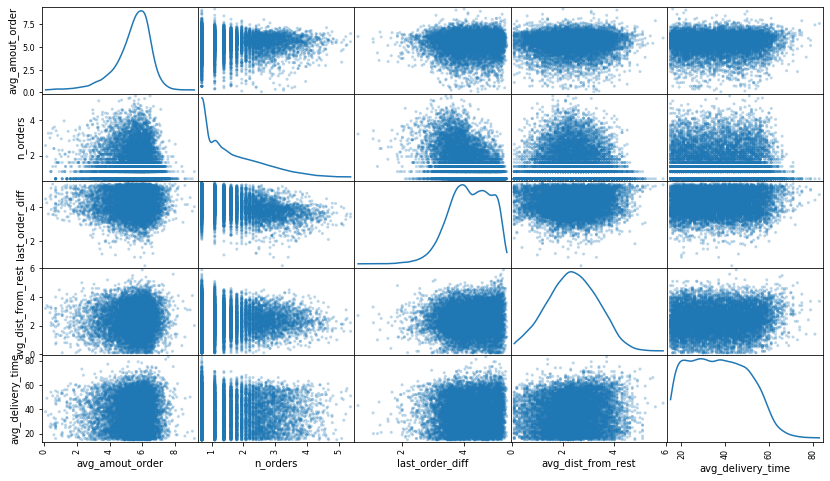

In [1766]:
scaled_data = pd.concat([log_features, normal_features], axis=1)
pd.plotting.scatter_matrix(scaled_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

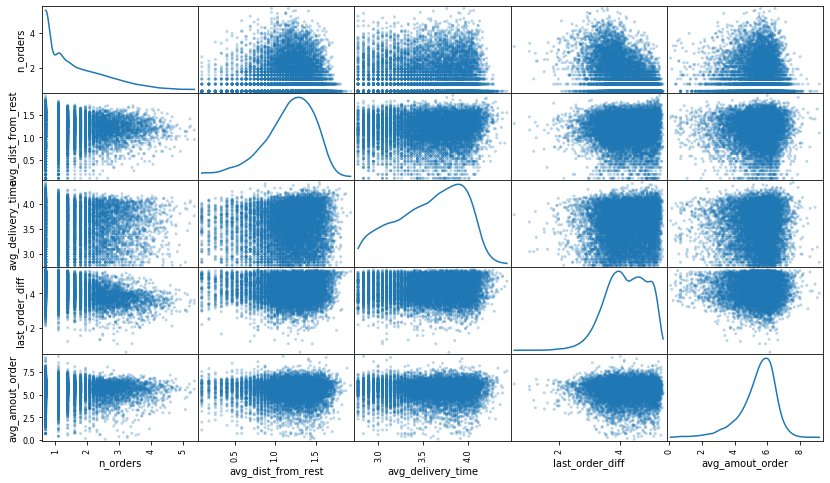

In [1767]:
# scale the data using natural logarithm
log_data = model_data.apply(lambda x: np.log(x+1))

# scale the samples using natural logarithm
log_samples = samples.apply(lambda x: np.log(x+1))

# plot scatter matrix for each pair of newly-transformed data
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [1768]:
log_samples

,n_orders,amount,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
0,4.890349,10.409461,1.029619,3.178054,4.193131,5.530619
1,3.871201,8.926916,1.410987,3.637586,3.293390,5.082832
2,0.693147,5.509388,1.223775,4.127134,5.287558,5.509388


In [1769]:
log_data.describe()

,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,1.524216,1.166205,3.569698,4.192971,5.448126
std,0.919198,0.319251,0.371986,0.666487,1.085491
min,0.693147,0.095310,2.772589,0.561994,0.076961
25%,0.693147,0.993252,3.295837,3.730996,4.941642
50%,1.098612,1.223775,3.624252,4.209031,5.642350
75%,2.079442,1.410987,3.871201,4.731235,6.172509
max,5.361292,1.931521,4.430817,5.393984,9.201047


### Outlier Detected

In [1770]:
outliers = []
for feature in log_data.keys():
    Q1= log_data.describe()[feature][4]
    Q3= log_data.describe()[feature][6]
    outlier_step = (Q3-Q1)*1.5
    out = log_data[~((log_data[feature] >= Q1 - outlier_step) & (log_data[feature] <= Q3 + outlier_step))]
    print('{} outlier range : [{} , {}]'.format(feature,Q1 - outlier_step,Q3 + outlier_step))
    print('{} outliers : {}'.format(feature,len(list(out.index.values))))
    outliers = outliers + list(out.index.values)
    display(out)
# creating list of outliers which are same across different features

outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

n_orders outlier range : [-1.38629436111989 , 4.158883083359671]
n_orders outliers : 103


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
0,5.361292,0.955511,3.951244,3.580853,6.485780
1,5.356586,1.163151,3.761200,3.414031,5.592180
2,5.247024,1.252763,4.060443,3.587273,5.255305
3,5.220356,1.410987,4.025352,3.463498,5.179365
4,5.209486,1.223775,3.610918,3.259004,6.150304
...,...,...,...,...,...
98,4.174387,1.280934,4.094345,2.690395,4.669740
99,4.158883,1.098612,3.663562,3.588061,6.258606
100,4.158883,1.098612,3.988984,2.912275,5.432280
101,4.158883,0.693147,3.891820,3.224195,5.600309


avg_dist_from_rest outlier range : [0.36664897196031554 , 2.03758977476023]
avg_dist_from_rest outliers : 230


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
432,3.465736,0.262364,3.891820,3.978526,6.394677
479,3.401197,0.336472,3.931826,4.088413,6.285029
1116,2.833213,0.336472,3.610918,1.629241,6.002503
1126,2.833213,0.336472,3.610918,3.231024,6.381173
1392,2.639057,0.095310,3.465736,2.169847,4.479947
...,...,...,...,...,...
9807,0.693147,0.262364,3.135494,4.679034,7.225481
9842,0.693147,0.095310,3.433987,5.007464,5.273000
9874,0.693147,0.095310,3.737670,4.865069,5.303305
9924,0.693147,0.336472,3.091042,4.992594,5.257495


avg_delivery_time outlier range : [2.432790648648986 , 4.734247228263234]
avg_delivery_time outliers : 0


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order


last_order_diff outlier range : [2.2306383206650695 , 6.231593310431362]
last_order_diff outliers : 52


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
21,4.663439,1.252763,3.583519,2.092807,5.792190
270,3.737670,0.875469,2.772589,2.166272,5.678089
308,3.663562,1.435085,3.688879,1.978508,5.471514
321,3.637586,0.916291,3.583519,2.011192,6.046923
329,3.637586,0.788457,3.433987,2.070548,6.337834
364,3.583519,0.993252,3.931826,2.201383,5.075861
382,3.555348,1.481605,3.135494,2.222218,5.930280
406,3.496508,1.029619,3.988984,2.054302,4.963963
442,3.433987,1.098612,4.007333,1.665477,6.590205
481,3.401197,1.335001,3.218876,2.025861,3.772301


avg_amout_order outlier range : [3.0953422236731445 , 8.018809420836236]
avg_amout_order outliers : 393


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
32,4.574711,1.252763,3.970292,3.304110,2.967847
64,4.369448,1.435085,3.637586,3.169948,2.991724
118,4.094345,1.386294,4.043051,3.359483,3.031582
162,3.970292,0.832909,3.784190,3.942498,2.839078
167,3.951244,1.386294,2.890372,3.049865,2.860485
...,...,...,...,...,...
9823,0.693147,0.875469,3.135494,5.051168,1.791759
9844,0.693147,1.064711,2.833213,4.794108,2.484907
9855,0.693147,1.410987,3.091042,4.133198,8.777864
9898,0.693147,0.741937,3.988984,5.120013,2.772589


In [1771]:
print("Outliers common across features: {}".format(outliers))

Outliers common across features: [32, 64, 2944, 9475, 9253, 1392, 9074, 6932, 21, 8308, 8469, 8283, 1116, 4574]


In [1772]:
final_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
label = label.drop(log_data.index[outliers]).reset_index(drop = True)
print("The final dataset now has {} observations after removing outliers.".format(len(final_data)))
final_data.describe()

The final dataset now has 9964 observations after removing outliers.


,n_orders,avg_dist_from_rest,avg_delivery_time,last_order_diff,avg_amout_order
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,1.523622,1.166638,3.569977,4.193767,5.448570
std,0.917919,0.318720,0.371953,0.665431,1.085350
min,0.693147,0.095310,2.772589,0.561994,0.076961
25%,0.693147,0.993252,3.295837,3.731662,4.941642
50%,1.098612,1.223775,3.637586,4.209140,5.642350
75%,2.079442,1.410987,3.871201,4.731381,6.172744
max,5.361292,1.931521,4.430817,5.393984,9.201047


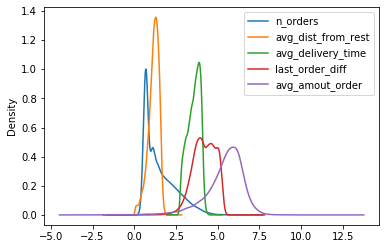

In [1773]:
final_data.plot(kind='density')

### Feature Transformation

In [1774]:
from sklearn.decomposition import PCA

pca = PCA().fit(final_data)

[0.43781208 0.36439939 0.10931487 0.05169488 0.03677878]
[0.43781208 0.80221147 0.91152634 0.96322122 1.        ]


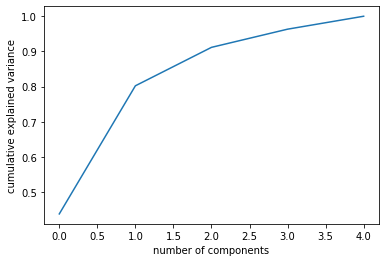

In [1775]:
print(pca.explained_variance_ratio_) 
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print(cum_var_exp)
plot.plot(cum_var_exp)
plot.xlabel('number of components')
plot.ylabel('cumulative explained variance')
plot.show()

In [1776]:
print(pca.components_)
display(pd.DataFrame(pca.components_,columns=final_data.columns,index=['PCA 1','PCA 2']))

[[ 0.15166128 -0.00624113 -0.00292374 -0.06103576 -0.98652217]
 [ 0.87398348  0.01038734 -0.00864093 -0.45773198  0.16263994]
 [-0.46111688 -0.009692   -0.05863586 -0.88520435 -0.01588664]
 [ 0.02141119 -0.22284452 -0.97301909  0.05566485  0.00414117]
 [ 0.00803258 -0.97473049  0.22296293 -0.00841145  0.00726103]]


ValueError: Shape of passed values is (5, 5), indices imply (2, 5)

### Dimensionality Reduction

In [ ]:
# apply pca by fitting the final data with only two dimensions
pca = PCA(n_components=2).fit(final_data)

# transform the final data using the PCA fit
reduced_data = pca.transform(final_data)

In [ ]:
reduced_data= pd.DataFrame(reduced_data,columns=['Dimension 1', 'Dimension 2'])
reduced_data.head()

In [ ]:
plot.scatter(reduced_data['Dimension 1'],reduced_data['Dimension 2'])
plot.xlabel('Dimenshion 1')
plot.ylabel('Dimenshion 2')
plot.title('Reduced dimenshion')

In [ ]:
def biplot(final_data, reduced_data, pca):
    
    fig, ax = plot.subplots(figsize = (25,18))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, final_data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(final_data, reduced_data, pca)

### Clustering

In [ ]:
n_clusters = list(range(2,11))

In [ ]:
for n in n_clusters:
    clusterer = GaussianMixture(n_components=n).fit(reduced_data)
    preds = clusterer.predict(reduced_data)

    # cluster centers
    centers = clusterer.means_
    
    # calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n, score))

In [ ]:
for n in n_clusters:
    clustererK = KMeans(n_clusters=n).fit(reduced_data)

    # predict the cluster for each data point
    preds = clustererK.predict(reduced_data)

    # find the cluster centers
    centers = clustererK.cluster_centers_

    # predict the cluster for each transformed sample data point
    #sample_preds = clusterer.predict(pca_samples)

    # calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n, score))


### Clusters

In [ ]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GaussianMixture(n_components=3).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
print(centers)
clustererK = KMeans(n_clusters=3).fit(reduced_data)
preds = clustererK.predict(reduced_data)
centers = clustererK.cluster_centers_
print(centers)

In [ ]:
plot.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=clustererK.labels_, cmap='viridis')  
plot.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=1);

### Data Recovery

In [ ]:
# take inverse transform of the centers
log_centers = pca.inverse_transform(centers)

# take exponential of the centers
true_centers = np.exp(log_centers)

# display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = model_data.keys())
true_centers.index = segments
display(true_centers)

In [ ]:
# Clusters' deviation from median
display(true_centers - log_data.median())

# Clusters' deviation from mean
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
display(true_centers - log_data.mean())